In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [4]:
print(boston_dataset)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [5]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

In [8]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
boston['MEDV'] = boston_dataset.target

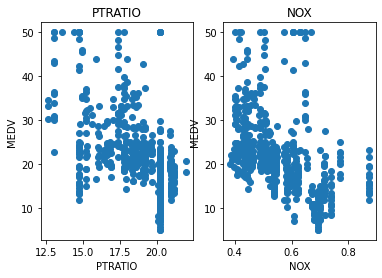

In [10]:
features = ['PTRATIO', 'NOX']
target = boston['MEDV']
for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x = boston[col]
    y = target
    plt.scatter(x,y, marker = 'o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [13]:
X = pd.DataFrame(np.c_[boston['PTRATIO'],boston['NOX']], columns = ['NOX','PTRATIO'])
Y = boston['MEDV']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(379, 2)
(127, 2)
(379,)
(127,)


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [16]:
from sklearn.metrics import r2_score
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)
print(y_test_predict)
print(rmse)
print(r2)

[20.66421898 27.72495827 29.21232775 25.02212356 16.18893117 17.4010623
 23.89419172 16.18893117 27.33768694 17.39842643 18.28298593 27.01213146
 21.3804584  24.75223547 15.83616171 13.89592973 17.82678933 18.25515224
 26.09702389 25.7044808  15.20621627 24.68726402 28.28183005 26.20378513
 36.97728801 24.52413717 15.33220535 18.91890135 15.33220535 25.62888735
 28.08307798 25.62888735 25.36295307 19.89301041 21.3804584  31.80293488
 20.66421898 25.25355595 30.12479945 29.07835254 16.39051371 28.08307798
 23.89419172 26.09702389 27.01213146 24.44389168 26.77604703 25.7044808
 21.3804584  18.28298593 24.44389168 18.25515224 19.89301041 16.18893117
 15.65977699 25.62888735 25.62888735 18.28298593 23.89155584 24.44389168
 17.4010623  18.25515224 17.4010623  14.65186427 36.97728801 21.96985349
 32.84294579 24.75223547 15.83616171 24.71509771 30.12479945 16.18893117
 24.44389168 15.75126419 25.7044808  26.36892813 15.33220535 28.08307798
 28.08307798 18.68351515 26.20378513 28.08307798 24.7

In [17]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=1.5)
ridge_reg.fit(X_train,Y_train)
ytestpredict=ridge_reg.predict(X_test)
rmse=np.sqrt(mean_squared_error(Y_test,ytestpredict))
r2 = r2_score(Y_test, ytestpredict)
print(rmse)
print(r2)

7.908774438364063
0.39080899450568596


<AxesSubplot:>

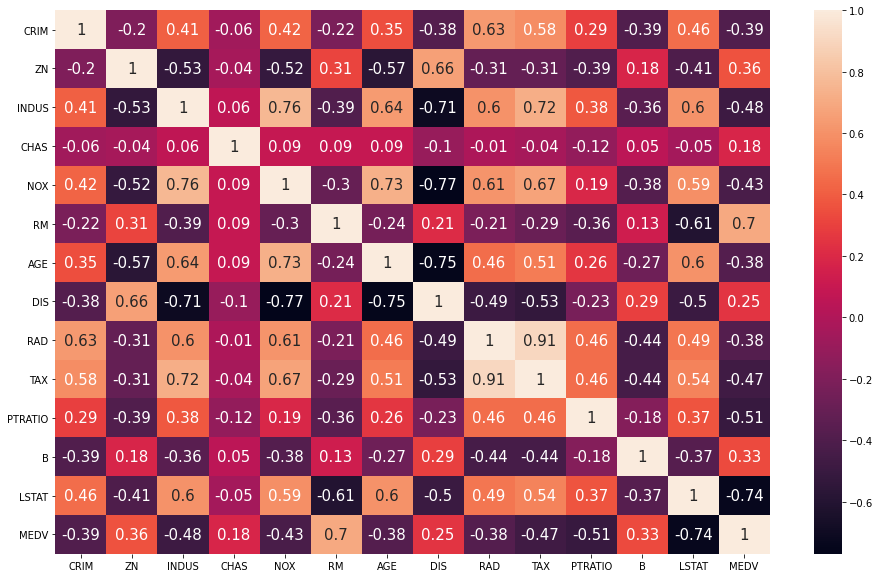

In [21]:
fig, ax = plt.subplots(figsize=(16, 10))
correlation_matrix = boston.corr().round(2)
sns.heatmap(data = correlation_matrix, annot=True, annot_kws={'size':15})